In [1]:
!pip install lifelines

     -------------------------------------- 349.7/349.7 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 48.9/48.9 kB ? eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4032 sha256=178f8d18e5de797ed2f0c763bf0515f29ec7a206a91f303438834d9a43094a5f
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a8\03\64\8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


In [2]:
import pandas as pd 
from lifelines import KaplanMeierFitter

In [6]:
# Loading the survival un-emplyoment data
survival_unemp = pd.read_csv(r"C:\Users\HP\Downloads\survival_unemployment.csv")

In [7]:
survival_unemp.head()

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22


In [8]:
survival_unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   spell    3343 non-null   int64  
 1   event    3343 non-null   int64  
 2   ui       3343 non-null   int64  
 3   logwage  3343 non-null   float64
 4   age      3343 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 130.7 KB


In [9]:
survival_unemp.describe()

,spell,event,ui,logwage,age
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,6.247981,0.320969,0.552797,5.692994,35.443314
std,5.611271,0.466919,0.497279,0.535659,10.640204
min,1.000000,0.000000,0.000000,2.708050,20.000000
25%,2.000000,0.000000,0.000000,5.298320,27.000000
50%,5.000000,0.000000,1.000000,5.676750,34.000000
75%,9.000000,1.000000,1.000000,6.052090,43.000000
max,28.000000,1.000000,1.000000,7.600400,61.000000


In [11]:
survival_unemp["spell"].describe()

count    3343.000000
mean        6.247981
std         5.611271
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        28.000000
Name: spell, dtype: float64

In [12]:
# Spell is reffering to time
T = survival_unemp.spell
T 

0        5
1       13
2       21
3        3
4        9
        ..
3338    11
3339     4
3340     5
3341     1
3342     8
Name: spell, Length: 3343, dtype: int64

In [13]:
# Initiating the KaplanMeireFitter model
kmf = KaplanMeierFitter()

In [14]:
# Fitting KaplanMeireFitter model on Time and Events for death
kmf.fit(T, event_observed=survival_unemp.event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3343 total observations, 2270 right-censored observations>

<AxesSubplot:xlabel='timeline'>

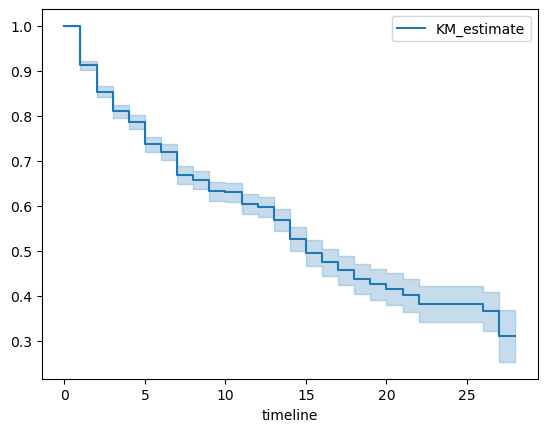

In [15]:
# Time line estimation plot
kmf.plot()

In [16]:
# Over multiple groups
# for each group , here group is ui
survival_unemp.ui.value_counts()

1    1848
0    1495
Name: ui, dtype: int64

In [17]:
survival_unemp

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22
...,...,...,...,...,...
3338,11,0,1,5.69373,41
3339,4,0,1,5.92959,27
3340,5,0,1,5.80513,30
3341,1,1,0,5.24175,29


<AxesSubplot:xlabel='timeline'>

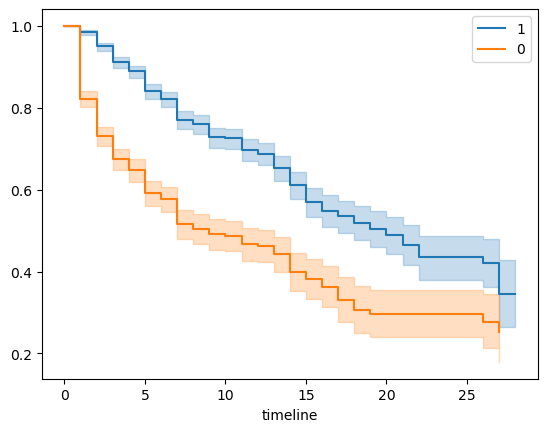

In [19]:
# Applying KaplanMeireFitter model on Time and Events for the group "1"
kmf.fit(T[survival_unemp.ui==1], survival_unemp.event[survival_unemp.ui==1], label='1')
ax = kmf.plot()

#Applying KaplanMeireFitter model on Time and Events for the groupn"0"
kmf.fit(T[survival_unemp.ui==0], survival_unemp.event[survival_unemp.ui==0], label='0')
kmf.plot()